In [1]:
import pandas as pd
import numpy as np
import geopandas as gpd
import matplotlib.pyplot as plt
import seaborn as sns

### Top 5 at risk for past 5 years

In [2]:
#Load risk score file
risk = pd.read_csv(r'D:\CivicDataLab_IDS-DRR\IDS-DRR_Github\Deployment\IDS-DRR-Assam-Risk-Model\RiskScoreModel\data\risk_score_final_district.csv')
#Create a dataframe for district level aggregated data (this data is appended at the end of the risk score file, and has no entries for revenue)
risk_dist = risk.loc[risk['revenue-ci'].isnull()]
#calculate average historical risk score for each district and sort in descending order to identify the most at risk districts. topsis-score is used to rank the districts
dist_risk = risk_dist.groupby('district').agg({'topsis-score':'mean'}).reset_index()
dist_risk_sort = dist_risk.sort_values(by='topsis-score', ascending=False)
dist_risk_sort

C:\Users\saura\AppData\Local\Temp\ipykernel_39052\2455359613.py:2: DtypeWarning: Columns (69,70,71) have mixed types. Specify dtype option on import or set low_memory=False.
  risk = pd.read_csv(r'D:\CivicDataLab_IDS-DRR\IDS-DRR_Github\Deployment\IDS-DRR-Assam-Risk-Model\RiskScoreModel\data\risk_score_final_district.csv')


,district,topsis-score
23,LAKHIMPUR,0.529134
30,SOUTH SALMARA MANCACHAR,0.520681
11,DIBRUGARH,0.498054
3,BISWANATH,0.492199
29,SONITPUR,0.489189
32,TINSUKIA,0.487279
28,SIVASAGAR,0.480626
9,DHEMAJI,0.460598
2,BARPETA,0.457372
6,CHARAIDEO,0.453493


In [3]:
# Calculate the average factor scores for the top five districts
for n in dist_risk_sort['district'].head(10):
    a = risk_dist.loc[risk_dist['district']==n].agg({'exposure':'mean'})
    b = risk_dist.loc[risk_dist['district']==n].agg({'flood-hazard':'mean'})
    c = risk_dist.loc[risk_dist['district']==n].agg({'vulnerability':'mean'})
    d = risk_dist.loc[risk_dist['district']==n].agg({'government-response':'mean'})
    e = risk_dist.loc[risk_dist['district']==n].agg({'risk-score':'mean'})
    print(n , '=' , a,b,c,d,e)    

LAKHIMPUR = exposure    1.0
dtype: float64 flood-hazard    3.066667
dtype: float64 vulnerability    4.177778
dtype: float64 government-response    4.911111
dtype: float64 risk-score    3.4
dtype: float64
SOUTH SALMARA MANCACHAR = exposure    4.533333
dtype: float64 flood-hazard    3.022222
dtype: float64 vulnerability    2.044444
dtype: float64 government-response    5.0
dtype: float64 risk-score    3.222222
dtype: float64
DIBRUGARH = exposure    2.0
dtype: float64 flood-hazard    2.844444
dtype: float64 vulnerability    3.955556
dtype: float64 government-response    4.6
dtype: float64 risk-score    3.177778
dtype: float64
BISWANATH = exposure    2.0
dtype: float64 flood-hazard    2.8
dtype: float64 vulnerability    4.155556
dtype: float64 government-response    4.622222
dtype: float64 risk-score    3.088889
dtype: float64
SONITPUR = exposure    5.0
dtype: float64 flood-hazard    2.577778
dtype: float64 vulnerability    3.955556
dtype: float64 government-response    4.688889
dtype: flo

In [4]:
# Calculate the average factor scores for the top five districts
for n in dist_risk_sort['district'].head(5):
    a = risk_dist.loc[risk_dist['district']==n].agg({'exposure':'mean'})
    b = risk_dist.loc[risk_dist['district']==n].agg({'flood-hazard':'mean'})
    c = risk_dist.loc[risk_dist['district']==n].agg({'vulnerability':'mean'})
    d = risk_dist.loc[risk_dist['district']==n].agg({'government-response':'mean'})
    print(n , '=' , a,b,c,d)    

LAKHIMPUR = exposure    1.0
dtype: float64 flood-hazard    3.066667
dtype: float64 vulnerability    4.177778
dtype: float64 government-response    4.911111
dtype: float64
SOUTH SALMARA MANCACHAR = exposure    4.533333
dtype: float64 flood-hazard    3.022222
dtype: float64 vulnerability    2.044444
dtype: float64 government-response    5.0
dtype: float64
DIBRUGARH = exposure    2.0
dtype: float64 flood-hazard    2.844444
dtype: float64 vulnerability    3.955556
dtype: float64 government-response    4.6
dtype: float64
BISWANATH = exposure    2.0
dtype: float64 flood-hazard    2.8
dtype: float64 vulnerability    4.155556
dtype: float64 government-response    4.622222
dtype: float64
SONITPUR = exposure    5.0
dtype: float64 flood-hazard    2.577778
dtype: float64 vulnerability    3.955556
dtype: float64 government-response    4.688889
dtype: float64


### Specific indicators

In [5]:
#Use this code block to rank districts by specific indicators. replace ".agg({'indicator':'aggregation method'}" with the appropriate indicator and aggregation methods can be sum, min,max, mean - choose appropriately for the indicator.
lives_lost = risk_dist.groupby('district').agg({'human-live-lost':'sum'}).reset_index()
#sort by descending. replace indicator in "sort_values(by='indicator', ascending=False) with the indicator you want to rank by
lives_lost = lives_lost.sort_values(by='human-live-lost', ascending=False)
lives_lost

,district,human-live-lost
5,CACHAR,69
26,NAGAON,34
2,BARPETA,30
25,MORIGAON,17
14,GOLAGHAT,13
9,DHEMAJI,12
21,KARIMGANJ,12
13,GOALPARA,12
27,NALBARI,10
8,DARRANG,8


In [6]:
crop_loss = risk_dist.groupby('district').agg({'crop-area':'sum'}).reset_index()
crop_loss = crop_loss.sort_values(by='crop-area', ascending=False)
crop_loss

,district,crop-area
26,NAGAON,92262.0
25,MORIGAON,77080.0
2,BARPETA,73079.0
8,DARRANG,65913.0
9,DHEMAJI,60483.0
24,MAJULI,39577.0
18,KAMRUP,33435.0
23,LAKHIMPUR,32776.0
13,GOALPARA,31999.0
5,CACHAR,30667.0


In [7]:
sanctions = risk_dist.groupby('district').agg({'sdrf-sanctions-awarded-value':'sum'}).reset_index()
sanctions = sanctions.sort_values(by='sdrf-sanctions-awarded-value', ascending=True)
sanctions

,district,sdrf-sanctions-awarded-value
17,JORHAT,0.000000e+00
14,GOLAGHAT,0.000000e+00
21,KARIMGANJ,0.000000e+00
12,DIMA HASAO,0.000000e+00
11,DIBRUGARH,0.000000e+00
24,MAJULI,0.000000e+00
25,MORIGAON,0.000000e+00
15,HAILAKANDI,0.000000e+00
28,SIVASAGAR,0.000000e+00
6,CHARAIDEO,0.000000e+00


In [8]:
embankments = risk_dist.groupby('district').agg({'embankment-breached':'sum'}).reset_index()
embankments = embankments.sort_values(by='embankment-breached', ascending=False)
embankments

,district,embankment-breached
5,CACHAR,85.0
8,DARRANG,40.0
3,BISWANATH,28.0
33,UDALGURI,25.0
27,NALBARI,22.0
31,TAMULPUR,21.0
17,JORHAT,14.0
0,BAJALI,12.0
4,BONGAIGAON,12.0
2,BARPETA,9.0


In [9]:
#expenditure
dist_sdrf = risk_dist.groupby('district').agg({'total-expenditure-value':'sum'})
#dist_response = risk_dist.groupby('district').agg({'government-response':'mean'}).reset_index()
dist_sdrf_sort = dist_sdrf.sort_values(by='total-expenditure-value')#, ascending=False)
dist_sdrf_sort

,total-expenditure-value
district,
BAJALI,0.0
TAMULPUR,0.0
SIVASAGAR,0.0
LAKHIMPUR,0.0
KARBI ANGLONG,0.0
DIMA HASAO,0.0
CHIRANG,0.0
WEST KARBI ANGLONG,0.0
BONGAIGAON,0.0


In [10]:
# Highest and lowest funding received
risk_dist['total-funds'] = risk_dist['sdrf-sanctions-awarded-value'] + risk_dist['total-tender-awarded-value']
dist_response = risk_dist.groupby('district').agg({'total-funds':'sum'})
#dist_response = risk_dist.groupby('district').agg({'government-response':'mean'}).reset_index()
dist_response_sort = dist_response.sort_values(by='total-funds')#, ascending=False)
dist_response_sort

C:\Users\saura\AppData\Local\Temp\ipykernel_39052\234644770.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  risk_dist['total-funds'] = risk_dist['sdrf-sanctions-awarded-value'] + risk_dist['total-tender-awarded-value']


,total-funds
district,
SIVASAGAR,0.000000e+00
KARBI ANGLONG,9.000000e+04
DIMA HASAO,6.270000e+06
BONGAIGAON,3.464561e+07
HOJAI,8.885033e+07
CHARAIDEO,1.046393e+08
BAJALI,1.522176e+08
WEST KARBI ANGLONG,1.552478e+08
SOUTH SALMARA MANCACHAR,1.978338e+08


### Vulnerability score
This section is used to calculate the average vulnerability scores. This is used to identify districts with high losses and damages

In [13]:
# Load the vulnerability score file and calculate the average vulnerability score for each district. This is done for the monsoon months only, and the districts are sorted in descending order to identify the most vulnerable districts.
vul = pd.read_csv(r'D:\CivicDataLab_IDS-DRR\IDS-DRR_Github\Deployment\IDS-DRR-Assam-Risk-Model\RiskScoreModel\data\factor_scores_l1_vulnerability.csv')
vul_monsoon = vul.loc[vul['timeperiod'].str.split('_').str[1].isin(['06', '07', '08', '09'])]
#vul_ranking = vul_monsoon.groupby('district').agg({'landd_score':'sum'}).reset_index()
vul_ranking = vul.groupby('district').agg({'landd_score':'sum'}).reset_index()

vul_ranking = vul_ranking.sort_values(by='landd_score', ascending=False)
for m in vul_ranking['district']:#.head(10):
    a = vul.loc[vul['district']==m].agg({'landd_score':'sum'})
    b = risk_dist.loc[risk_dist['district']==m].agg({'flood-hazard':'mean'})
    c = risk_dist.loc[risk_dist['district']==m].agg({'vulnerability':'mean'})
    d = risk_dist.loc[risk_dist['district']==m].agg({'government-response':'mean'})
    print(m , '=' , a,b,c,d)

KAMRUP = landd_score    593.932677
dtype: float64 flood-hazard    1.844444
dtype: float64 vulnerability    1.977778
dtype: float64 government-response    4.377778
dtype: float64
UDALGURI = landd_score    406.874358
dtype: float64 flood-hazard    1.933333
dtype: float64 vulnerability    3.955556
dtype: float64 government-response    5.0
dtype: float64
NALBARI = landd_score    373.631786
dtype: float64 flood-hazard    2.2
dtype: float64 vulnerability    1.088889
dtype: float64 government-response    5.0
dtype: float64
KOKRAJHAR = landd_score    363.305807
dtype: float64 flood-hazard    2.022222
dtype: float64 vulnerability    2.955556
dtype: float64 government-response    4.866667
dtype: float64
NAGAON = landd_score    323.561983
dtype: float64 flood-hazard    1.711111
dtype: float64 vulnerability    2.777778
dtype: float64 government-response    4.711111
dtype: float64
DHUBRI = landd_score    318.619309
dtype: float64 flood-hazard    2.755556
dtype: float64 vulnerability    2.133333
dty

In [18]:
vul.columns

Index(['object_id', 'district', 'rc_area', 'timeperiod',
       'total_tender_awarded_value', 'SOPD_tenders_awarded_value',
       'SDRF_sanctions_awarded_value', 'SDRF_tenders_awarded_value',
       'RIDF_tenders_awarded_value', 'LTIF_tenders_awarded_value',
       'CIDF_tenders_awarded_value',
       'Preparedness Measures_tenders_awarded_value',
       'Immediate Measures_tenders_awarded_value',
       'Others_tenders_awarded_value', 'Total_Animal_Washed_Away',
       'Total_Animal_Affected', 'Population_affected_Total', 'Crop_Area',
       'Male_Camp', 'Female_Camp', 'Children_Camp',
       'Total_House_Fully_Damaged', 'Human_Live_Lost',
       'Human_Live_Lost_Children', 'Human_Live_Lost_Female',
       'Human_Live_Lost_Male', 'Embankments affected', 'Roads', 'Bridge',
       'Embankment breached', 'max_rain', 'mean_rain', 'sum_rain', 'mean_ndvi',
       'mean_ndbi', 'count', 'inundation_pct', 'inundation_intensity_mean',
       'inundation_intensity_mean_nonzero', 'inundation_int

<Axes: >

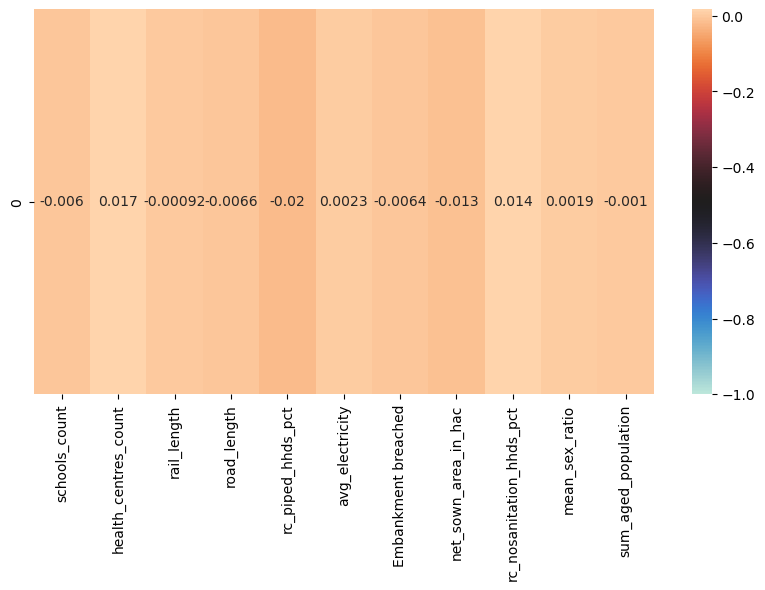

In [20]:
# correlation between landd score and sdrf sanctions
plt.figure(figsize=(10,5))
corr_series = vul[["schools_count", "health_centres_count", "rail_length", "road_length",
				   "rc_piped_hhds_pct", "avg_electricity", "Embankment breached",
				   "net_sown_area_in_hac", "rc_nosanitation_hhds_pct", "mean_sex_ratio",
				   "sum_aged_population"]].corrwith(vul['SDRF_sanctions_awarded_value'])
# Convert the Series to a DataFrame and transpose so we get a 2D structure
corr_df = corr_series.to_frame().T
sns.heatmap(corr_df, vmin=-1, annot=True, cmap="icefire")

In [83]:
vulnerability_vars = ["mean_sex_ratio",
                      "schools_count",
                      "health_centres_count",
                      "rail_length",
                      "road_length",
                      "net_sown_area_in_hac",
                      "avg_electricity",
                      "rc_piped_hhds_pct",
                      
                      "rc_nosanitation_hhds_pct",
                      "sum_aged_population",
                      "Embankment breached",
                     ]
damage_vars = [#"Total_Animal_Affected","Total_House_Fully_Damaged"
               "Human_Live_Lost","Population_affected_Total", "Crop_Area","Embankments affected",
                 "Roads","Bridge"]

infratructure_vars = ["Embankment breached","Roads", "Bridge"]
infratructure_vars_form = ["embankment-breached","roads", "bridge"]
vul['infrastructure_damage'] = vul[infratructure_vars].sum(axis=1)
risk_dist['infrastructure-damage'] = risk_dist[infratructure_vars_form].sum(axis=1)


all_vars = {"mean_sex_ratio":"mean",
            "schools_count":"max",
            "health_centres_count":"max",
            "rail_length":"max",
            "road_length":"max",
            "net_sown_area_in_hac":"max",
            "avg_electricity":"max",
            "rc_piped_hhds_pct":"max",
            
            "rc_nosanitation_hhds_pct":"max",
            "sum_aged_population":"max",
            "Embankment breached":"sum",
            "Human_Live_Lost":"sum",
            "Population_affected_Total":"max", 
            "Crop_Area":"sum",
            "Embankments affected":"max",
            "Roads":"sum",
            "Bridge":"sum",
            "infrastructure_damage":"sum"
            }

all_vars_risk_formatted = {
    "mean-sex-ratio": "mean",
    "schools-count": "max",
    "health-centres-count": "max",
    "rail-length": "max",
    "road-length": "max",
    "net-sown-area-in-hac": "max",
    "avg-electricity": "max",
    "rc-piped-hhds-pct": "max",
    "rc-nosanitation-hhds-pct": "max",
    "sum-aged-population": "max",
    "embankment-breached": "sum",
    "human-live-lost": "sum",
    "population-affected-total": "max",
    "crop-area": "sum",
    "embankments-affected": "max",
    "roads": "sum",
    "bridge": "sum",
    "infrastructure-damage": "sum",
}


C:\Users\saura\AppData\Local\Temp\ipykernel_46384\1164114225.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  risk_dist['infrastructure-damage'] = risk_dist[infratructure_vars_form].sum(axis=1)


In [80]:
infrastructure_rank = risk_dist.groupby('district').agg({'infrastructure-damage':'sum'}).reset_index()
infrastructure_rank = infrastructure_rank.sort_values(by='infrastructure-damage', ascending=False)
infrastructure_rank

,district,infrastructure-damage
2,BARPETA,1049.0
5,CACHAR,784.0
27,NALBARI,597.0
26,NAGAON,567.0
10,DHUBRI,480.0
8,DARRANG,424.0
0,BAJALI,403.0
4,BONGAIGAON,384.0
18,KAMRUP,367.0
21,KARIMGANJ,360.0


In [84]:
for n in dist_risk_sort['district'][14:16]:
    for m in all_vars.keys():
        avg = vul.loc[vul['district'] == n, m].agg(all_vars[m])
        print(f"{n} - {m} = {avg}")

CACHAR - mean_sex_ratio = 0.9399176093088927
CACHAR - schools_count = 1064
CACHAR - health_centres_count = 71
CACHAR - rail_length = 42280.08533136024
CACHAR - road_length = 394328.9813114788
CACHAR - net_sown_area_in_hac = 20596.63
CACHAR - avg_electricity = 11.475855130784709
CACHAR - rc_piped_hhds_pct = 17.466564090424903
CACHAR - rc_nosanitation_hhds_pct = 24.905314238371403
CACHAR - sum_aged_population = 46411.68200000003
CACHAR - Embankment breached = 85.0
CACHAR - Human_Live_Lost = 69
CACHAR - Population_affected_Total = 725306.0
CACHAR - Crop_Area = 30667.26
CACHAR - Embankments affected = 13.0
CACHAR - Roads = 698.0
CACHAR - Bridge = 1.0
CACHAR - infrastructure_damage = 784.0
MAJULI - mean_sex_ratio = 0.9416277114980678
MAJULI - schools_count = 423
MAJULI - health_centres_count = 20
MAJULI - rail_length = 0.0
MAJULI - road_length = 33932.77730119641
MAJULI - net_sown_area_in_hac = 10909.71
MAJULI - avg_electricity = 9.435180143388692
MAJULI - rc_piped_hhds_pct = 7.813776204737

In [ ]:
# SDRF SANCTIONs for top5 at risk
for n in dist_risk_sort['district'][14:16]:
    for f in risk_dist['financial-year'].unique():
        avg = risk_dist.loc[(risk_dist['district'] == n) & (risk_dist['financial-year'] == f), 'sdrf-sanctions-awarded-value'].agg(sum)
        print(f"{n} - {f} - {'sdrf-sanction'} = {avg}")

CACHAR - 2021-2022 - sdrf-sanction = 0.0
CACHAR - 2022-2023 - sdrf-sanction = 0.0
CACHAR - 2023-2024 - sdrf-sanction = 0.0
CACHAR - 2024-2025 - sdrf-sanction = 0.0
MAJULI - 2021-2022 - sdrf-sanction = 0.0
MAJULI - 2022-2023 - sdrf-sanction = 0.0
MAJULI - 2023-2024 - sdrf-sanction = 0.0
MAJULI - 2024-2025 - sdrf-sanction = 0.0


C:\Users\saura\AppData\Local\Temp\ipykernel_46384\2393937449.py:3: FutureWarning: The provided callable <built-in function sum> is currently using Series.sum. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "sum" instead.
  avg = risk_dist.loc[(risk_dist['district'] == n) & (risk_dist['financial-year'] == f), 'sdrf-sanctions-awarded-value'].agg(sum)


In [85]:
# Calculate the average factor scores for the selected districts and variables
for n in dist_risk_sort['district'][14:16]:
    for f in risk_dist['financial-year'].unique():
        for m in all_vars_risk_formatted.keys():
            avg = risk_dist.loc[(risk_dist['district'] == n) & (risk_dist['financial-year'] == f), m].agg(all_vars_risk_formatted[m])
            print(f"{n} - {f} - {m} = {avg}")
            #for m in all_vars.keys():
            #    avg = vul.loc[vul['district'] == n, m].agg(all_vars[m])
            #    print(f"{n} - {m} = {avg}")
    

CACHAR - 2021-2022 - mean-sex-ratio = 0.9399999999999998
CACHAR - 2021-2022 - schools-count = 3322
CACHAR - 2021-2022 - health-centres-count = 176
CACHAR - 2021-2022 - rail-length = 103488.0
CACHAR - 2021-2022 - road-length = 988230.0
CACHAR - 2021-2022 - net-sown-area-in-hac = 66721.37
CACHAR - 2021-2022 - avg-electricity = 9.8
CACHAR - 2021-2022 - rc-piped-hhds-pct = 8.53
CACHAR - 2021-2022 - rc-nosanitation-hhds-pct = 15.87
CACHAR - 2021-2022 - sum-aged-population = 107625.0
CACHAR - 2021-2022 - embankment-breached = 0.0
CACHAR - 2021-2022 - human-live-lost = 0
CACHAR - 2021-2022 - population-affected-total = 0.0
CACHAR - 2021-2022 - crop-area = 874.0
CACHAR - 2021-2022 - embankments-affected = 0.0
CACHAR - 2021-2022 - roads = 0.0
CACHAR - 2021-2022 - bridge = 0.0
CACHAR - 2021-2022 - infrastructure-damage = 0.0
CACHAR - 2022-2023 - mean-sex-ratio = 0.9399999999999998
CACHAR - 2022-2023 - schools-count = 3322
CACHAR - 2022-2023 - health-centres-count = 176
CACHAR - 2022-2023 - rail-

In [74]:
for n in lives_lost['district'].head(5):
    for m in all_vars_risk_formatted.keys():
        avg = risk_dist.loc[(risk_dist['district'] == n) , m].agg(all_vars_risk_formatted[m])
        print(f"{n} -  {m} = {avg}")

CACHAR -  mean-sex-ratio = 0.9399999999999996
CACHAR -  schools-count = 3322
CACHAR -  health-centres-count = 176
CACHAR -  rail-length = 103488.0
CACHAR -  road-length = 988230.0
CACHAR -  net-sown-area-in-hac = 66721.37000000001
CACHAR -  avg-electricity = 9.8
CACHAR -  rc-piped-hhds-pct = 8.53
CACHAR -  rc-nosanitation-hhds-pct = 15.87
CACHAR -  sum-aged-population = 115757.0
CACHAR -  embankment-breached = 85.0
CACHAR -  human-live-lost = 69
CACHAR -  population-affected-total = 1434750.0
CACHAR -  crop-area = 10630.0
CACHAR -  embankments-affected = 17.0
CACHAR -  roads = 698.0
CACHAR -  bridge = 1.0
CACHAR -  infrastructure-damage = 784.0
NAGAON -  mean-sex-ratio = 0.9399999999999996
NAGAON -  schools-count = 3284
NAGAON -  health-centres-count = 277
NAGAON -  rail-length = 174517.0
NAGAON -  road-length = 1331470.0
NAGAON -  net-sown-area-in-hac = 87424.202
NAGAON -  avg-electricity = 9.8
NAGAON -  rc-piped-hhds-pct = 4.98
NAGAON -  rc-nosanitation-hhds-pct = 23.51
NAGAON -  sum

### Top 5 at risk vulnerability indicators

In [58]:
# Calculate the average factor scores for the selected districts and variables
for n in dist_risk_sort['district'].head(5):
    for f in risk_dist['financial-year'].unique():
        for m in all_vars_risk_formatted.keys():
            avg = risk_dist.loc[(risk_dist['district'] == n) & (risk_dist['financial-year'] == f), m].agg(all_vars_risk_formatted[m])
            print(f"{n} - {f} - {m} = {avg}")
            #for m in all_vars.keys():
            #    avg = vul.loc[vul['district'] == n, m].agg(all_vars[m])
            #    print(f"{n} - {m} = {avg}")
    

LAKHIMPUR - 2021-2022 - mean-sex-ratio = 0.9399999999999998
LAKHIMPUR - 2021-2022 - schools-count = 3519
LAKHIMPUR - 2021-2022 - health-centres-count = 124
LAKHIMPUR - 2021-2022 - rail-length = 108334.0
LAKHIMPUR - 2021-2022 - road-length = 804067.0
LAKHIMPUR - 2021-2022 - net-sown-area-in-hac = 90513.46103
LAKHIMPUR - 2021-2022 - avg-electricity = 8.3
LAKHIMPUR - 2021-2022 - rc-piped-hhds-pct = 2.83
LAKHIMPUR - 2021-2022 - rc-nosanitation-hhds-pct = 16.32
LAKHIMPUR - 2021-2022 - sum-aged-population = 58342.0
LAKHIMPUR - 2021-2022 - embankment-breached = 0.0
LAKHIMPUR - 2021-2022 - human-live-lost = 0
LAKHIMPUR - 2021-2022 - population-affected-total = 128234.0
LAKHIMPUR - 2021-2022 - crop-area = 8551.0
LAKHIMPUR - 2021-2022 - embankments-affected = 1.0
LAKHIMPUR - 2021-2022 - roads = 3.0
LAKHIMPUR - 2021-2022 - bridge = 0.0
LAKHIMPUR - 2021-2022 - infrastructure-damage = 3.0
LAKHIMPUR - 2022-2023 - mean-sex-ratio = 0.9399999999999998
LAKHIMPUR - 2022-2023 - schools-count = 3519
LAKHIM

In [ ]:
# Identify the districts with the districts highest
risk_dist['total-funds'] = risk_dist['sdrf-sanctions-awarded-value'] + risk_dist['total-tender-awarded-value']#
#dist_response = risk_dist.groupby('district').agg({'total-funds':'sum'})
dist_response = risk_dist.groupby('district').agg({'government-response':'mean'}).reset_index()
dist_response_sort = dist_response.sort_values(by='government-response', ascending=False)
dist_response_sort

C:\Users\saura\AppData\Local\Temp\ipykernel_49156\3513192972.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  risk_dist['total-funds'] = risk_dist['total-expenditure-value'] + risk_dist['total-tender-awarded-value']#


,district,government-response
0,BAJALI,5.000000
12,DIMA HASAO,5.000000
33,UDALGURI,5.000000
30,SOUTH SALMARA MANCACHAR,5.000000
28,SIVASAGAR,5.000000
27,NALBARI,5.000000
20,KARBI ANGLONG,5.000000
1,BAKSA,5.000000
15,HAILAKANDI,5.000000
14,GOLAGHAT,5.000000


## Monsoon calculations

In [18]:
# Calculate the average risk score only for the monsoon months. Follows a similar process as above, but only for the months of June, July, August and September.  
monsoon = risk_dist[risk_dist['timeperiod'].str.split('_').str[1].isin(['06', '07', '08', '09'])]
monsoon_risk = monsoon.groupby('district').agg({'topsis-score':'mean'}).reset_index()
monsoon_risk_sort = monsoon_risk.sort_values(by='topsis-score', ascending=False)
monsoon_risk_csv = []
for m in monsoon_risk_sort['district'].head(5):
    a = monsoon.loc[monsoon['district']==m].agg({'exposure':'mean'})
    b = monsoon.loc[monsoon['district']==m].agg({'flood-hazard':'mean'})
    c = monsoon.loc[monsoon['district']==m].agg({'vulnerability':'mean'})
    d = monsoon.loc[monsoon['district']==m].agg({'government-response':'mean'})
    e = monsoon.loc[monsoon['district']==m].agg({'topsis-score':'mean'})

    #e = monsoon.loc[monsoon['district']==m].agg({'landd-score':'mean'})
    #print(m , '=' , a,b,c,d)#,e)
    monsoon_risk_csv.append([m, a.values[0], b.values[0], c.values[0], d.values[0]])#, e.values[0]])
monsoon_risk_csv = pd.DataFrame(monsoon_risk_csv, columns=['district', 'exposure', 'flood-hazard', 'vulnerability', 'government-response'])
monsoon_risk_csv#.to_csv(r'D:\CivicDataLab_IDS-DRR\ASDMA Meetings\Pre-monsoon-2025_SDRF\monsoon_risk_district.csv', index=False)


,district,exposure,flood-hazard,vulnerability,government-response
0,SOUTH SALMARA MANCACHAR,4.5,3.5000,2.1250,5.0000
1,LAKHIMPUR,1.0,2.9375,4.3750,5.0000
2,SONITPUR,5.0,2.8750,3.8750,4.6250
3,BARPETA,3.0,3.0000,2.8750,4.4375
4,SIVASAGAR,2.0,3.1875,2.9375,5.0000


### Top 5 at risk 2024-2025

In [2]:
risk = pd.read_csv(r'D:\CivicDataLab_IDS-DRR\IDS-DRR_Github\Deployment\IDS-DRR-Assam-Risk-Model\RiskScoreModel\data\risk_score_final_district.csv')
risk_dist = risk.loc[risk['revenue-ci'].isnull()]
fy_2024 = ['2024_04','2024_05','2024_06','2024_07','2024_08','2024_09','2024_10','2024_11','2024_12','2025_01','2025_02','2025_03']
risk_2024_25 = risk_dist.loc[risk_dist['timeperiod'].isin(fy_2024)]
risk_2022_23 = risk_dist.loc[risk_dist['financial-year']=='2023-2024']
risk_2022_23

C:\Users\saura\AppData\Local\Temp\ipykernel_49156\3212882080.py:1: DtypeWarning: Columns (69,70,71) have mixed types. Specify dtype option on import or set low_memory=False.
  risk = pd.read_csv(r'D:\CivicDataLab_IDS-DRR\IDS-DRR_Github\Deployment\IDS-DRR-Assam-Risk-Model\RiskScoreModel\data\risk_score_final_district.csv')


,object-id,district,rc-area,timeperiod,total-tender-awarded-value,sopd-tenders-awarded-value,sdrf-sanctions-awarded-value,sdrf-tenders-awarded-value,ridf-tenders-awarded-value,ltif-tenders-awarded-value,...,drainage-density,exposure,flood-hazard,flood-hazard-float,government-response,financial-year,vulnerability,efficiency,topsis-score,risk-score
8124,18-799,BAJALI,470,2023_04,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000681,1,4,NaN,5,2023-2024,1,0.977035,0.559291,4
8125,18-799,BAJALI,470,2023_05,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000681,1,2,NaN,5,2023-2024,1,0.977035,0.308184,1
8126,18-799,BAJALI,470,2023_06,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000681,1,5,NaN,5,2023-2024,1,0.973026,0.633947,4
8127,18-799,BAJALI,470,2023_07,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000681,1,2,NaN,5,2023-2024,1,0.959467,0.348908,2
8128,18-799,BAJALI,470,2023_08,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000681,1,3,NaN,5,2023-2024,1,0.981003,0.469876,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9661,18-759,WEST KARBI ANGLONG,3073,2023_11,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000439,3,3,NaN,5,2023-2024,4,0.805140,0.533788,4
9662,18-759,WEST KARBI ANGLONG,3073,2023_12,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000439,3,3,NaN,5,2023-2024,4,0.805140,0.533788,3
9663,18-759,WEST KARBI ANGLONG,3073,2024_01,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000439,3,1,NaN,5,2023-2024,4,0.805980,0.292692,2
9664,18-759,WEST KARBI ANGLONG,3073,2024_02,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000439,3,1,NaN,5,2023-2024,4,0.805980,0.292692,2


In [6]:
dist_risk_2223 = risk_2022_23.groupby('district').agg({'topsis-score':'mean'}).reset_index()
dist_sort_2223 = dist_risk_2223.sort_values(by='topsis-score', ascending=False)
dist_sort_2223

,district,topsis-score
23,LAKHIMPUR,0.576622
3,BISWANATH,0.537589
11,DIBRUGARH,0.525574
30,SOUTH SALMARA MANCACHAR,0.523714
28,SIVASAGAR,0.516169
32,TINSUKIA,0.505235
6,CHARAIDEO,0.479166
2,BARPETA,0.479046
9,DHEMAJI,0.475093
24,MAJULI,0.474510


In [19]:
dist_risk_2425 = risk_2024_25.groupby('district').agg({'topsis-score':'mean'}).reset_index()
dist_sort = dist_risk_2425.sort_values(by='topsis-score', ascending=False)
dist_sort

,district,topsis-score
21,KARIMGANJ,0.536036
30,SOUTH SALMARA MANCACHAR,0.531752
11,DIBRUGARH,0.487695
2,BARPETA,0.478961
23,LAKHIMPUR,0.473408
15,HAILAKANDI,0.472468
10,DHUBRI,0.468628
28,SIVASAGAR,0.462065
5,CACHAR,0.461285
6,CHARAIDEO,0.458497


In [35]:
top10_list = dist_sort['district'].head(10).tolist()
print("Top 10 districts in dist_sort:", top10_list)

Top 10 districts in dist_sort: ['KARIMGANJ', 'SOUTH SALMARA MANCACHAR', 'DIBRUGARH', 'BARPETA', 'LAKHIMPUR', 'HAILAKANDI', 'DHUBRI', 'SIVASAGAR', 'CACHAR', 'CHARAIDEO']


In [ ]:
dist_vul_2425 = risk_2024_25.groupby('district').agg({'vulnerability':'mean'}).reset_index()
dist_vul = dist_vul_2425.sort_values(by='vulnerability', ascending=False)
dist_vul

,district,vulnerability
25,MORIGAON,4.777778
16,HOJAI,4.666667
34,WEST KARBI ANGLONG,4.333333
23,LAKHIMPUR,4.333333
3,BISWANATH,4.333333
32,TINSUKIA,4.111111
11,DIBRUGARH,4.000000
29,SONITPUR,4.000000
33,UDALGURI,4.000000
9,DHEMAJI,3.333333


In [ ]:
# Ranking by vulnerability
vul = pd.read_csv(r'D:\CivicDataLab_IDS-DRR\IDS-DRR_Github\Deployment\IDS-DRR-Assam-Risk-Model\RiskScoreModel\data\factor_scores_l1_vulnerability.csv')
vul_fy24 = vul.loc[vul['timeperiod'].isin(fy_2024)]
vul_dist = vul_fy24.groupby(['district']).mean('landd_score').reset_index()
vul_dist = vul_dist.sort_values(by='landd_score', ascending=False)
vul_dist

,district,rc_area,total_tender_awarded_value,SOPD_tenders_awarded_value,SDRF_sanctions_awarded_value,SDRF_tenders_awarded_value,RIDF_tenders_awarded_value,LTIF_tenders_awarded_value,CIDF_tenders_awarded_value,Preparedness Measures_tenders_awarded_value,...,avg_electricity,avg_tele,rc_piped_hhds_pct,rc_nosanitation_hhds_pct,total_hhd,distance_from_river,drainage_density,efficiency,vulnerability,landd_score
6,CHARAIDEO,357.666667,9.026353e+05,9.026353e+05,0.0,0.0,0.000000e+00,0.0,0.0,0.0,...,8.624159,2.000000,3.802528,19.713480,36078.333333,4700.953196,0.000603,0.865896,3.000000,1.064854
24,MAJULI,485.000000,5.106683e+07,0.000000e+00,0.0,0.0,0.000000e+00,0.0,0.0,0.0,...,9.350751,2.500000,4.953339,17.280869,19619.500000,1292.455559,0.000625,0.892194,2.333333,1.053512
21,KARIMGANJ,367.800000,1.273939e+06,0.000000e+00,0.0,0.0,0.000000e+00,0.0,0.0,0.0,...,9.769837,2.400000,5.566885,14.247125,51232.200000,4060.318063,0.000533,0.959178,1.533333,1.047542
5,CACHAR,756.600000,2.825410e+06,0.000000e+00,0.0,0.0,1.857672e+06,0.0,0.0,0.0,...,9.771465,2.200000,8.534447,15.871015,83220.200000,3222.517656,0.000441,0.853619,3.000000,1.035562
9,DHEMAJI,413.833333,4.755809e+06,2.499565e+06,0.0,0.0,0.000000e+00,0.0,0.0,0.0,...,7.045081,2.000000,2.257948,20.872455,32504.166667,2238.641533,0.000553,0.827450,3.500000,1.034918
13,GOALPARA,395.800000,9.122372e+06,1.296579e+06,0.0,0.0,0.000000e+00,0.0,0.0,0.0,...,8.904281,2.000000,3.554577,25.416326,48091.800000,3585.306932,0.000571,0.847237,3.111111,1.033781
3,BISWANATH,594.333333,2.212126e+07,0.000000e+00,0.0,0.0,0.000000e+00,0.0,0.0,0.0,...,8.895602,2.333333,4.204080,28.459534,50312.666667,4363.593881,0.000613,0.805915,3.888889,1.033502
26,NAGAON,366.285714,3.407232e+06,6.906902e+05,0.0,0.0,0.000000e+00,0.0,0.0,0.0,...,9.826001,2.000000,4.975220,23.507534,75346.714286,3477.530108,0.000575,0.874396,2.841270,1.030543
10,DHUBRI,222.428571,1.963771e+06,0.000000e+00,0.0,0.0,0.000000e+00,0.0,0.0,0.0,...,7.527789,2.571429,1.185372,25.006394,53958.571429,2231.599333,0.000652,0.898141,2.380952,1.028673
15,HAILAKANDI,332.250000,0.000000e+00,0.000000e+00,0.0,0.0,0.000000e+00,0.0,0.0,0.0,...,9.485312,2.000000,4.009654,19.261827,41446.000000,4335.474967,0.000502,0.939078,1.833333,1.026444


In [9]:
expenses = pd.read_csv(r'D:\CivicDataLab_IDS-DRR\IDS-DRR_Github\Deployment\flood-data-ecosystem-Assam\Sources\SDRF\data\flood_expenses_RCgeotagged.csv')
fy_expenses = ['2024-25']
expenses_fy24 = expenses.loc[expenses['Financial Year'].isin(fy_expenses)] 
expenses_fy24

,Unnamed: 0,Name of the Scheme,Whether scheme,Whether the scheme is funded by NABARD,Proposal Number,Proposal Date,Issued Number,Valid Upto,Admin Department File Number,Brief nature of the scheme,...,tender_district_title_description,tender_district_location,DISTRICT_FINALISED,tender_villages,tender_block,tender_subdistrict,tender_revenueci,tender_revenueci_location,HQ_flag,REVENUE_CIRCLE_FINALISED
84,6215,Immediate measures to flood protection & drain...,Ongoing Project(Parent Proposal No. AA-05-2018...,NaN,NaN,26-07-2024,NaN,NaN,NaN,NaN,...,KARIMGANJ,KARIMGANJ,KARIMGANJ,"PATHARKANDI,Patharkandi",RAMKRISHNA NAGAR,Patharkandi,Patharkandi,Karimganj,True,Karimganj
85,6291,Restoration of road from Kanaibazar- Anipur PW...,Ongoing Project(Parent Proposal No. AA-05-2014...,NaN,NaN,13-11-2024,NaN,NaN,-N/A-,-N/A-,...,NaN,KARIMGANJ,KARIMGANJ,"ANIPUR,KANAIBAZAR",PATHARKANDI,Badarpur,Nilambazar,Karimganj,True,Karimganj
251,6245,Strengthening of the road from Thikadarbasti t...,New project,No,AA-05-2024-25-7313,02-09-2024,AA/05_2024-25(I)_5587,02-09-2029,496063,Mitigation Scheme,...,HOJAI,HOJAI,HOJAI,"THIKADARBASTI,ThikadarBasti,DOBOKA",JUGIJAN,Doboka,Doboka,Hojai,True,Hojai
260,6323,Immediate measures to restore breach like dama...,Ongoing Project(Parent Proposal No. AA-05-2024...,NaN,NaN,04-03-2025,NaN,NaN,-N/A-,-N/A-,...,WEST KARBI ANGLONG,NaN,WEST KARBI ANGLONG,NaN,NaN,NaN,NaN,NaN,False,NaN
650,6139,Temporary Restoration of Rangia-Hajo Road at S...,New project,No,AA-05-2024-25-7205,30-07-2024,AA/05_2024-25(I)_5567,13-08-2027,296030,FDR,...,KAMRUP,NaN,KAMRUP,Simalua,RANGIA,Hajo,Hajo,NaN,False,Hajo
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6379,6372,Repair/Renovation of Circle Office building in...,Ongoing Project(Parent Proposal No. AA-05-2021...,NaN,NaN,30-10-2024,NaN,NaN,-N/A-,-N/A-,...,DIBRUGARH,KAMRUP METRO,CONFLICT,NaN,NaN,NaN,NaN,NaN,False,NaN
6380,6375,Repairing / renovation work of the office buil...,Ongoing Project(Parent Proposal No. AA-05-2021...,NaN,NaN,19-12-2024,NaN,NaN,-N/A-,-N/A-,...,KARIMGANJ,KAMRUP METRO,CONFLICT,NaN,NaN,NaN,NaN,NaN,False,NaN
6381,6376,Repairing and Renovation of Circle Office buil...,Ongoing Project(Parent Proposal No. AA-05-2020...,NaN,NaN,19-12-2024,NaN,NaN,-N/A-,-N/A-,...,GOALPARA,KAMRUP METRO,CONFLICT,NaN,NaN,NaN,NaN,NaN,False,NaN
6382,6377,Construction of Circle Office building includi...,Ongoing Project(Parent Proposal No. AA-LRS-201...,NaN,NaN,07-01-2025,NaN,NaN,-N/A-,-N/A-,...,DIBRUGARH,KAMRUP METRO,CONFLICT,NaN,NaN,NaN,NaN,NaN,False,NaN


In [10]:
# Identifying the top 10 districts with the highest administrative approval amount
dist_fy24 = expenses_fy24.groupby(['DISTRICT_FINALISED']).agg({'Total Administrative Approval Amount In Lakhs':'sum'}).reset_index()
dist_fy24_sorted = dist_fy24.sort_values(by='Total Administrative Approval Amount In Lakhs', ascending=False)
dist_fy24_sorted

,DISTRICT_FINALISED,Total Administrative Approval Amount In Lakhs
15,KAMRUP METRO,4518.14092
14,KAMRUP,2917.14534
10,GOLAGHAT,1926.78000
5,CONFLICT,1392.71539
19,SIVSAGAR,927.14000
11,HOJAI,674.06461
6,DHEMAJI,503.98200
21,UDALGURI,480.36900
17,NAGAON,302.50000
20,SONITPUR,223.01300


In [14]:
## Identifying the highest value expenses

expenses_fy24_sorted = expenses_fy24.sort_values(by='Total Administrative Approval Amount In Lakhs', ascending=False)
expenses_fy24_sorted.head(20)

,Unnamed: 0,Name of the Scheme,Whether scheme,Whether the scheme is funded by NABARD,Proposal Number,Proposal Date,Issued Number,Valid Upto,Admin Department File Number,Brief nature of the scheme,...,tender_district_title_description,tender_district_location,DISTRICT_FINALISED,tender_villages,tender_block,tender_subdistrict,tender_revenueci,tender_revenueci_location,HQ_flag,REVENUE_CIRCLE_FINALISED
1842,6381,Procurement of Machinery and Trolley Mounted P...,New project,No,AA-SDM-2024-25-0007,20-01-2025,AA/SDM_2024-25(I)_03,29-01-2030,499824,Procurement of Machinery and Trolley Mounted P...,...,KAMRUP METRO,NaN,KAMRUP METRO,NaN,NaN,Guwahati,Guwahati,NaN,False,Guwahati
653,6289,Improvement of road from Boko to Upper Lumpi (...,New project,No,AA-05-2024-25-7351,28-10-2024,AA/05_2024-25(I)_5627,05-11-2029,461420,Mitigation scheme,...,KAMRUP,NaN,KAMRUP,NaN,BOKO,Boko,Boko,NaN,False,Boko
654,6290,Improvement of road from Boko to Upper Lumpi (...,New project,No,AA-05-2024-25-7351,28-10-2024,AA/05_2024-25(I)_5627,05-11-2029,461420,Mitigation scheme,...,KAMRUP,NaN,KAMRUP,NaN,BOKO,Boko,Boko,NaN,False,Boko
1721,6298,Flood mitigation at Chowdangpathar area by dre...,New project,No,AA-05-2024-25-7414,11-02-2025,AA/05_2024-25(I)_5650,27-02-2030,574276,Mitigation Scheme,...,NaN,GOLAGHAT,GOLAGHAT,GHILADHARI,GOLAGHAT EAST,Golaghat,Golaghat,Golaghat,True,Golaghat
4446,6297,"Cleaning of Jamuna canal around Sivasagar, Bor...",New project,No,AA-05-2024-25-7413,11-02-2025,AA/05_2024-25(I)_5651,27-02-2030,574276,Mitigation Scheme,...,SIVSAGAR,SIVSAGAR,SIVSAGAR,NaN,SIVASAGAR,Dimow,Dimow,Sibsagar,True,Sibsagar
1834,6361,Designing Scientific Land Valuation Framework ...,New project,No,AA-LRS-2024-25-7325,30-09-2024,AA/LRS_2024-25(I)_5501,18-11-2029,532720,Implementation of Scientific Land Valuation Fr...,...,NaN,KAMRUP METRO,KAMRUP METRO,NaN,NaN,NaN,NaN,NaN,False,NaN
251,6245,Strengthening of the road from Thikadarbasti t...,New project,No,AA-05-2024-25-7313,02-09-2024,AA/05_2024-25(I)_5587,02-09-2029,496063,Mitigation Scheme,...,HOJAI,HOJAI,HOJAI,"THIKADARBASTI,ThikadarBasti,DOBOKA",JUGIJAN,Doboka,Doboka,Hojai,True,Hojai
5973,6316,Supply and Installation of Solar Powered Mobil...,New project,No,AA-05-2024-25-7439,13-02-2025,AA/05_2024-25(I)_5634,27-02-2028,574276,Mitigation scheme,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False,NaN
5972,6315,Supply and Installation of Solar Powered Mobil...,New project,No,AA-05-2024-25-7439,13-02-2025,AA/05_2024-25(I)_5634,27-02-2028,574276,Mitigation scheme,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False,NaN
1564,6383,Resilient Relief Camp on Wheels in 02 flood pr...,New project,No,AA-SDM-2024-25-0009,25-02-2025,AA/SDM_2024-25(I)_05,13-03-2028,231771,Resilient Relief Camp on Wheels in 02 flood pr...,...,NAGAON,NaN,NAGAON,NaN,NaN,Nagaon,Nagaon,NaN,False,Nagaon


In [ ]:
exp_22_23 = expenses.loc[expenses['Financial Year']=='2022-23']
exp_22_23_march = exp_22_23.loc[exp_22_23['Month']=='March']

In [16]:
golaghat_24 = expenses_fy24_sorted.head(20).loc[expenses_fy24_sorted['DISTRICT_FINALISED']=='GOLAGHAT']
golaghat_24

,Unnamed: 0,Name of the Scheme,Whether scheme,Whether the scheme is funded by NABARD,Proposal Number,Proposal Date,Issued Number,Valid Upto,Admin Department File Number,Brief nature of the scheme,...,tender_district_title_description,tender_district_location,DISTRICT_FINALISED,tender_villages,tender_block,tender_subdistrict,tender_revenueci,tender_revenueci_location,HQ_flag,REVENUE_CIRCLE_FINALISED
1721,6298,Flood mitigation at Chowdangpathar area by dre...,New project,No,AA-05-2024-25-7414,11-02-2025,AA/05_2024-25(I)_5650,27-02-2030,574276,Mitigation Scheme,...,NaN,GOLAGHAT,GOLAGHAT,GHILADHARI,GOLAGHAT EAST,Golaghat,Golaghat,Golaghat,True,Golaghat
1722,6299,Dhansiri river bank Anti Erosion Project at Dh...,New project,No,AA-05-2024-25-7415,11-02-2025,AA/05_2024-25(I)_5649,27-02-2028,574276,Mitigation Scheme,...,GOLAGHAT,GOLAGHAT,GOLAGHAT,"DHANSIRIPAR,Dhansiripar,GOLAGHAT",GOLAGHAT WEST,Golaghat,Golaghat,Golaghat,True,Golaghat
1723,6300,Gelabill River Bank Anti Erosion Project at Ka...,New project,No,AA-05-2024-25-7416,11-02-2025,AA/05_2024-25(I)_5648,27-02-2028,574276,Mitigation Scheme,...,NaN,GOLAGHAT,GOLAGHAT,NaN,NaN,NaN,NaN,Golaghat,True,Golaghat
1725,6302,Doigurung river Bank Anti Erosion project at P...,New project,No,AA-05-2024-25-7418,11-02-2025,AA/05_2024-25(I)_5646,27-02-2028,574276,Mitigation Scheme,...,NaN,GOLAGHAT,GOLAGHAT,NaN,NaN,NaN,NaN,Golaghat,True,Golaghat


In [38]:
# Select top 10 districts from dist_sort based on the risk score.
top10 = dist_sort.head(10)

# Merge the top 10 districts with the funds dataframe.
# We assume that the 'district' column from dist_sort corresponds to 'DISTRICT_FINALISED' in dist_fy25_sorted.
top10_funds = pd.merge(top10, dist_fy25_sorted, left_on='district', right_on='DISTRICT_FINALISED', how='left')

# Sum the funds disbursed to the top 10 districts.
top10_total_funds = top10_funds['Total Administrative Approval Amount In Lakhs'].sum()

# Calculate the total funds disbursed across all districts.
total_funds = dist_fy25_sorted['Total Administrative Approval Amount In Lakhs'].sum()

# Compute the proportion.
proportion = top10_total_funds / total_funds

print("Proportion of funds received by the top 10 districts:", proportion)

Proportion of funds received by the top 10 districts: 0.009488021324028432
